In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
uber=pd.read_csv("uber_drives.csv")

In [3]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber.shape

(1156, 7)

In [5]:
uber.size

8092

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
uber.isnull().values.sum()

507

In [9]:
df=uber.dropna()
df.isnull().values.any()

False

In [10]:
uber.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [11]:
df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [12]:
unique_start_des = uber["START*"].dropna()
unique_start = set(unique_start_des)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [13]:
len(unique_start)

177

In [14]:
unique_stop_des = uber["STOP*"].dropna()
unique_stop = set(unique_stop_des)
unique_stop

{'Agnew',
 'Alief',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Arts District',
 'Asheville',
 'Banner Elk',
 'Bay Farm Island',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'Bywater',
 'CBD',
 'Capitol One',
 'Cary',
 'Cedar Hill',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Depot Historic District',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Faubourg Marigny',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'French Quarter',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gramercy-Flatiron',
 'Greater Greenspoint',
 'Gulfton',
 'Harden Place',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Hog Island',

In [15]:
len(unique_stop)

188

**Most popular starting point for the Uber drivers**

In [16]:
starting_point = uber["START*"].dropna()
df =pd.DataFrame(starting_point.value_counts())
df.sort_values(["START*"],ascending=False)

df=df.reset_index()
df=df.rename(columns={'index':'starting_destination','START*':'Count'})
df.loc[df['Count']==max(df['Count'])]

,starting_destination,Count
0,Cary,201


In [17]:
starting_point = uber["START*"].dropna()
df=pd.DataFrame(starting_point.value_counts())
df

,START*
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Florence,1
Ridgeland,1
Daytona Beach,1
Sky Lake,1


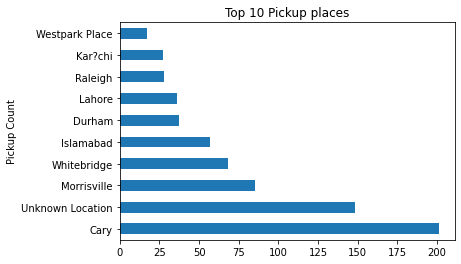

In [29]:
uber['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Pickup places')

**Cary is the most popular Starting point for this user**

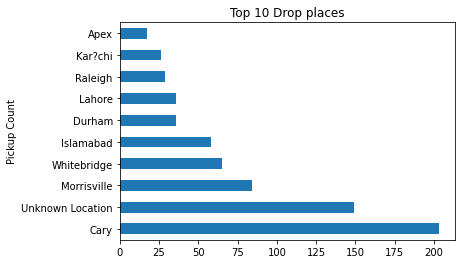

In [30]:
uber['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Drop places')

**Cary is the most popular Stop place for this user.
Maybe his home is in Cary (as mostly start & stop are from here)**

**Most Freqeuent Route**

In [19]:
df = uber.dropna()

df = pd.DataFrame(df.groupby(['START*', 'STOP*']).size())
df= df.rename (columns ={0: 'Count'})
df = df.sort_values(['Count'], ascending= False)

df.loc[df['Count'] == max(df[ 'Count'])]

,,Count
START*,STOP*,
Cary,Morrisville,52


**All purpose for trip**

In [21]:
print(np.array(uber['PURPOSE*'].dropna().unique()))
uber['MILES*'].groupby(uber['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

**Round Trip**

**Purpose Vs Distance**


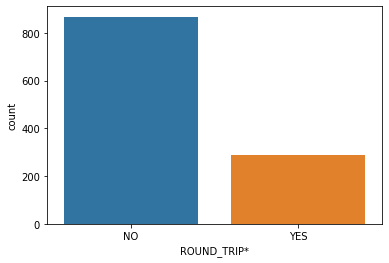

In [33]:
def is_roundtrip(uber):
    if uber['START*'] == uber['STOP*']:
        return 'YES'
    else:
        return 'NO'
    
uber['ROUND_TRIP*'] = uber.apply(is_roundtrip, axis=1)

sns.countplot(x='ROUND_TRIP*',data=uber, order=uber['ROUND_TRIP*'].value_counts().index)

In [35]:
uber['ROUND_TRIP*'].value_counts()

NO     868
YES    288
Name: ROUND_TRIP*, dtype: int64

User mostly take single-trip Uber rides.


Around 75% trip is single-trip and 25% are ROund-Trip

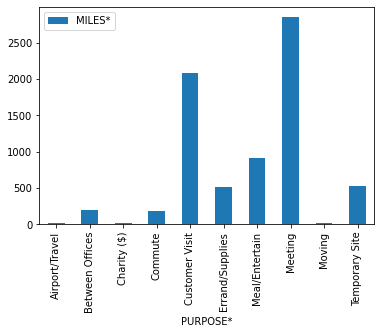

In [22]:
df=pd.DataFrame(uber['MILES*'].groupby(uber['PURPOSE*']).sum())
df.plot(kind='bar')
plt.show()

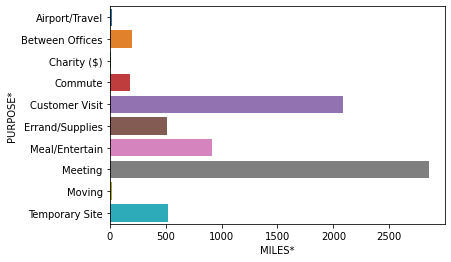

In [23]:
df=df.reset_index()
sns.barplot(x=df['MILES*'],y=df['PURPOSE*'])

**Purposes and the distsnce travelled for that particular Purpose**


In [24]:
print(np.array(uber['PURPOSE*'].dropna().unique()))
uber['MILES*'].groupby(uber['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

In [25]:
df

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


**Trip Vs Category of Trips**

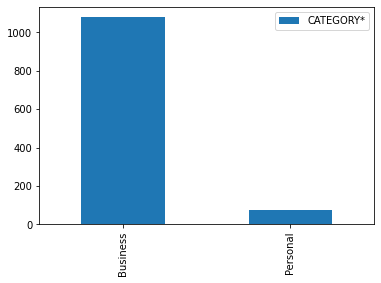

,CATEGORY*
Business,1078
Personal,77


In [26]:
uber.head()

df=pd.DataFrame(uber['CATEGORY*'].value_counts())
df.reset_index()

df.plot(kind = 'bar')
plt.show()
df

**Proprtion of Trips that is Business to Personal**

In [27]:
df = uber.groupby(['CATEGORY*']).sum()
Business= df.iloc[0,0]/(df.iloc[0,0]+ df.iloc[1,0]) 
Personal= df.iloc[1,0]/(df.iloc[0,0] + df.iloc[1,0])

print("Business:", Business)
print("Personal:", Personal)

Business: 0.9411947856153776
Personal: 0.058805214384622315


**Conclusion**

1. Uber taxis are mostly used by the user for business needs.

2. Over 94% of miles were used for business travel.

3. Only 6% of total miles were used for personal travel.

4. There are 177 different places to start.

5. The most frequent starting spot for this driver is Cary.

6. 188 different Stop points exist.

7. The most frequent drop-off location for this driver is Cary.

8. The largest distance travelled by a user on an Uber is between Cary and Durham between Cary and Morrisville.

9. User mostly uses Uber for one-way trips.

10. About 75% of trips are one-way, while 25% are round trips.

11. Users took the most rides in December and the fewest in September.

12. The most travels occur on Friday.

13. The most journeys tend to occur in the afternoon and evening.

14. Users' longest rides occurred in April and their shortest in November.


